In [96]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn import preprocessing
from sklearn.ensemble import AdaBoostClassifier
le = preprocessing.LabelEncoder()
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [94]:
ds= pd.read_csv("chem.csv")

In [8]:
ds.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [9]:
ds.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [11]:
ds.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [13]:
ds.shape

(1599, 12)

In [14]:
ds.info

<bound method DataFrame.info of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067

In [16]:
ds.keys

<bound method NDFrame.keys of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067  

In [19]:
x = ds.drop('quality', axis=1)
y = ds['quality']

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=50)

In [26]:
mm_scaler = preprocessing.MinMaxScaler()
x_train = mm_scaler.fit_transform(x_train)
x_test = mm_scaler.fit_transform(x_test)

In [27]:
ds.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


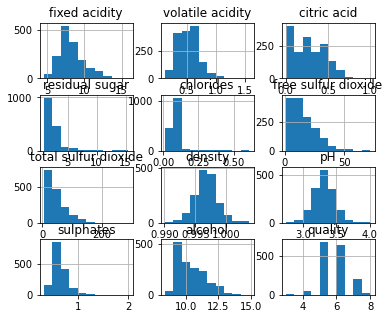

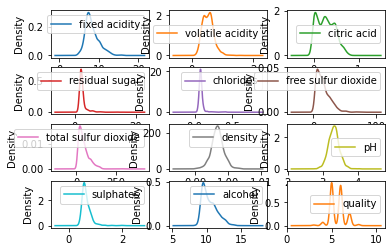

In [31]:
ds.hist(bins=10,figsize=(6, 5))
plt.show()
ds.plot(kind='density', subplots=True, layout=(4,3), sharex=False)
plt.show()

In [32]:
colum_names = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
ds_pivot_table = ds.pivot_table(colum_names,
               ['quality'], aggfunc='median')
print(ds_pivot_table)

         alcohol  chlorides  citric acid   density  fixed acidity  \
quality                                                             
3          9.925     0.0905        0.035  0.997565           7.50   
4         10.000     0.0800        0.090  0.996500           7.50   
5          9.700     0.0810        0.230  0.997000           7.80   
6         10.500     0.0780        0.260  0.996560           7.90   
7         11.500     0.0730        0.400  0.995770           8.80   
8         12.150     0.0705        0.420  0.994940           8.25   

         free sulfur dioxide    pH  residual sugar  sulphates  \
quality                                                         
3                        6.0  3.39             2.1      0.545   
4                       11.0  3.37             2.1      0.560   
5                       15.0  3.30             2.2      0.580   
6                       14.0  3.32             2.2      0.640   
7                       11.0  3.28             2.3      0

In [34]:
corr_matrix = ds.corr()
print(corr_matrix["quality"].sort_values(ascending=False))

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64


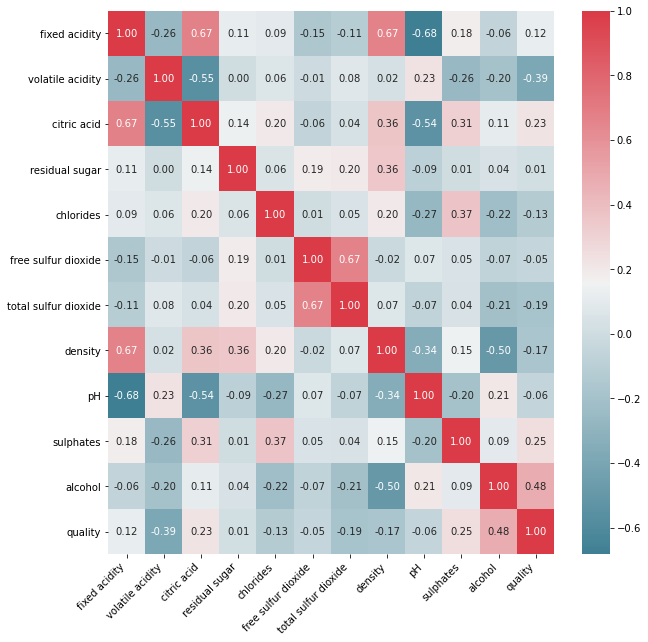

In [37]:
colum_names = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']
correlations = ds.corr()

fig, ax = plt.subplots(figsize=(10, 10))
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(correlations, cmap=colormap, annot=True, fmt=".2f")
ax.set_xticklabels(
    colum_names,
    rotation=45,
    horizontalalignment='right'
);
ax.set_yticklabels(colum_names);
plt.show()

In [60]:
models = []
models.append(('SupportVectorClassifier', SVC()))
models.append(('DecisionTreeClassifier', DecisionTreeClassifier()))
models.append(('KNeighborsClassifier', KNeighborsClassifier()))

In [65]:
results = []
names = []
scoring = 'accuracy'

In [70]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.459375
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         8
           5       0.63      0.47      0.54       167
           6       0.44      0.53      0.48       109
           7       0.35      0.37      0.36        30
           8       0.00      0.00      0.00         3

    accuracy                           0.46       320
   macro avg       0.24      0.23      0.23       320
weighted avg       0.51      0.46      0.48       320



In [78]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
predknn=knn.predict(x_test)
print(accuracy_score(y_test,predknn))
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

0.590625
0.590625
[[  1   1   0   1   0   0]
 [  2   1   5   0   0   0]
 [  3   3 120  40   1   0]
 [  0   1  46  56   6   0]
 [  0   1   4  14  11   0]
 [  0   0   0   2   1   0]]
              precision    recall  f1-score   support

           3       0.17      0.33      0.22         3
           4       0.14      0.12      0.13         8
           5       0.69      0.72      0.70       167
           6       0.50      0.51      0.50       109
           7       0.58      0.37      0.45        30
           8       0.00      0.00      0.00         3

    accuracy                           0.59       320
   macro avg       0.34      0.34      0.34       320
weighted avg       0.59      0.59      0.59       320



In [81]:
svc=SVC(kernel='rbf')
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.61875
[[  0   0   3   0   0   0]
 [  0   0   7   1   0   0]
 [  0   0 131  36   0   0]
 [  0   0  49  60   0   0]
 [  0   0   4  19   7   0]
 [  0   0   0   1   2   0]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         8
           5       0.68      0.78      0.73       167
           6       0.51      0.55      0.53       109
           7       0.78      0.23      0.36        30
           8       0.00      0.00      0.00         3

    accuracy                           0.62       320
   macro avg       0.33      0.26      0.27       320
weighted avg       0.60      0.62      0.59       320



NameError: name 'importances' is not defined